# Método de Gradiente Descendiente

Cuando se quiere realizar un ajuste de un modelo que depende no-linealmente de un conjunto de P parámetros $a_k$, k = 1, . . . , P. el procedimiento es se basa en buscar los parámetros que minimizan la función $\chi^2$.

La idea general es dar valores iniciales y desarrollar un procedimiento iterativo para mejorarlos.
Uno de los procedimientos para mejorar un conjunto inicial de parámetros es seguir la dirección de máximo crecimiento (o decrecimiento) indicada por el gradiente de $\chi^2$.

El método que usa el gradiente como indicador para optimizar los parámetros es el de “Gradiente Descendiente”, en el cual:

$$ \vec{a_{new}} = \vec{a_{old}} - \eta \vec{\nabla \chi^2} (\vec{a_{old}}) $$

donde $\vec{a}$ son los parámetros y $\eta$ es el tamaño del paso (fijo).

Para encontrar el mínimo local de una función, se toman pasos proporcionales al negativo del gradiente de la función chi-cuadrado en el punto actual. En cambio, si se dan pasos proporcionales al positivo del gradiente, se acerca a un máximo local de esa función.


Se comienza leyendo los datos pertenecientes a la función de luminosidad de galaxias obtenida por Blanton et al (2001), y realizando una función con el modelo de la función de Schechter que se quiere ajustar. Luego se aplica el método del gradiente descendiente.



In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import scipy.stats as st
#import random

In [14]:
sns.set()

### Datos de Blanton et al. 2001:

In [2]:
#exporto columnas
M = np.genfromtxt('datos2.dat', delimiter=',', usecols=0) #magnitud
f = np.genfromtxt('datos2.dat', delimiter=',', usecols=1) #frecuencia (es el fi)

In [3]:
#errores
e_in = np.genfromtxt('errores_inferiores.dat', delimiter=',', usecols=1) #puntos inferiores
e_su = np.genfromtxt('errores_superiores.dat', delimiter=',', usecols=1) #puntos superiores

In [4]:
#largo de las barras de error
d_in = f - e_in  #inferior
d_su = e_su - f  #superior

### Modelo propuesto:

Para más detalles de la función de Schechter ver el notebook 'g4-p1,p2,p3'.

In [5]:
def model(M,fi0,M0,a):
    lista=[]
    for i in range(len(M)):
        y=0.4 * log(10) * fi0 * (10**(-0.4*(M[i]-M0)*(a+1))) * exp(-10**(-0.4*(M[i]-M0))) #schechter
        lista.append(y)
    return lista

### Gráfico de los datos junto con el modelo con los valores obtenidos por Blanton:

In [6]:
#rango de M
sx = np.linspace(-23.5, -16, 100) #podria usarse min(M), max(M)

#valores de Blanton
sy = model(sx, fi0=0.0146, M0=-20.83, a=-1.2)

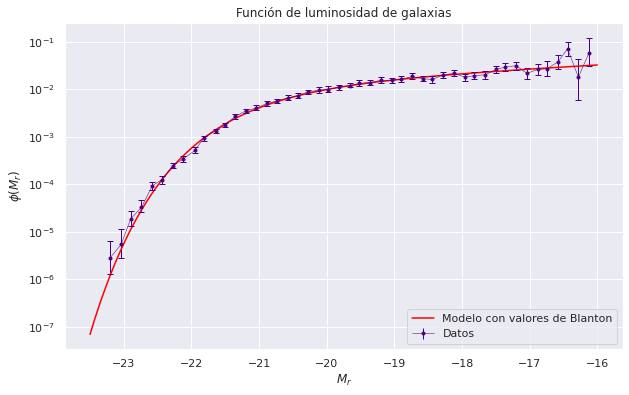

In [15]:
plt.figure(figsize=(10,6))
plt.plot(sx,sy, color='red', label='Modelo con valores de Blanton')

plt.errorbar(M, f, yerr= (d_in, d_su), marker='o', markersize=3, color='indigo', ecolor='indigo', elinewidth=1, linewidth=0.5, label='Datos')
plt.plot(M,e_in, '_', color='indigo')
plt.plot(M,e_su, '_', color='indigo')

plt.yscale('log')
plt.title('Función de luminosidad de galaxias')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend(loc='lower right')
plt.show()

### Función Chi-cuadrado $\chi^2$:

In [8]:
#largo de las barras de error
sigma= e_su - e_in

In [9]:
def chi2(M,f,fi0,M0,a,sigma=sigma):
    chi = 0
    f_model = model(M,fi0,M0,a)
    for i in range(len(M)):
        chi= chi + ((f[i] - f_model[i]) / sigma[i] )**2
        
    return(chi)

In [10]:
chi2(M,f,fi0=0.0146, M0=-20.83, a=-1.2) #valores de Blanton

6.358512565755951

In [11]:
chi2(M,f,fi0=0.0147, M0=-20.84, a=-1.21) #otros valores de prueba

6.797972558150359

Se analiza como se comporta $\chi^2$. Se determina un rango para los parámetros y se observa una "tajada" en cada plano posible entre los parámetros dejando el tercer parámetro fijo. Además se indica con un código de colores el valor de la función $\chi^2$ para ver graficamente donde se encuentra el mínimo de la misma.

In [12]:
N = 100
_X = np.linspace(0.0004, 0.025,N)  #fi0
_Y = np.linspace(-21.2, -20.2,N)  #M0
_W = np.linspace(-1.5, -0.9,N)  #a
_Z1 = np.zeros((N,N)) #matrices
_Z2 = np.zeros((N,N))
_Z3 = np.zeros((N,N))

for ix,x in enumerate(_X):
    for iy,y in enumerate(_Y):
        _Z1[iy,ix]=chi2(M,f,x, y, a=-1.2)

for ix,x in enumerate(_X):
    for iw,w in enumerate(_W):
        _Z2[iw,ix]=chi2(M,f,x, -20.83, w)
        
for iy,y in enumerate(_Y):
    for iw,w in enumerate(_W):
        _Z3[iw,iy]=chi2(M,f,0.0146, y, w)

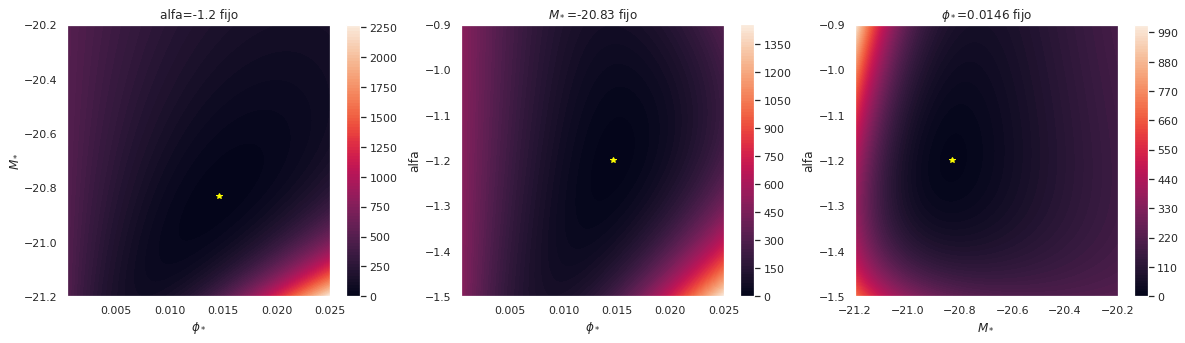

In [16]:
#parametro vs parametro
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100)
plt.colorbar()
plt.plot(0.0146, -20.83, '*', color='yellow')
plt.xlabel('$\phi_*$')
plt.ylabel('$M_*$')
plt.title('alfa=-1.2 fijo')

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100)
plt.colorbar()
plt.plot(0.0146, -1.2, '*', color='yellow')
plt.xlabel('$\phi_*$')
plt.ylabel('alfa')
plt.title('$M_*$=-20.83 fijo')

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100)
plt.colorbar()
plt.plot(-20.83, -1.2, '*', color='yellow')
plt.xlabel('$M_*$')
plt.ylabel('alfa')
plt.title('$\phi_*$=0.0146 fijo')

plt.show()

La estrella amarilla simboliza el valor de los parámetros de Blanton y se nota que el centro de las zonas más oscuras (mínimo) están centradas alrededor de esos valores. Alejandose de estos, la función $\chi^2$ empieza a aumentar su valor.

### Cálculo del gradiente:

$$ \vec{\nabla \chi^2} (\vec{a}) = \left( \frac{\partial \chi^2(\vec{a})} {\partial a_1},..., \frac{\partial \chi^2(\vec{a})} {\partial a_P}  \right)  $$

donde:

$$ \frac{\partial \chi^2(\vec{a})} {\partial a_i} = -2 \sum_{i=1}^{N} \frac{[f_i - model(M_i,\vec{a})]}{\sigma_i^2} . \frac{\partial model(M_i,\vec{a})} {\partial a_i} $$

con N el número de datos, $M_i$ y $f_i$ los valores de magnitudes y frecuencias medidos (datos), $model$ el modelo a ajustar y $\sigma_i$ los largos de las barras de error.

Se realiza una función para cada derivada parcial del modelo ya que luego se utilizan para armar el gradiente.

In [17]:
def derivada_dM_dfi0(M,fi0,M0,a):          #derivada del modelo respecto fi0
    lista=[]
    for i in range(len(M)):
        y=0.4 * log(10) * (10**(-0.4*(M[i]-M0)*(a+1))) * exp(-10**(-0.4*(M[i]-M0)))
        lista.append(y)
    return lista

In [18]:
def derivada_dM_dM0(M,fi0,M0,a):           #derivada del modelo respecto M0
    lista=[]
    for i in range(len(M)):
        #derivada:
        A = 0.4 * log(10) * fi0
        B = log(10) * (10**(-0.4*(M[i]-M0)*(a+1))) * 0.4 * (a+1) * exp(-10**(-0.4*(M[i]-M0)))
        C = (10**(-0.4*(M[i]-M0)*(a+1))) * exp(-10**(-0.4*(M[i]-M0))) * 0.4 * log(10) * (10**(-0.4*(M[i]-M0)))
        y= A * (B - C)
        lista.append(y)
    return lista

In [19]:
def derivada_dM_da(M,fi0,M0,a):            #derivada del modelo respecto a
    lista=[]
    for i in range(len(M)):
        y= 0.4 * log(10) * fi0 * log(10) * (10**(-0.4*(M[i]-M0)*(a+1))) * (-0.4) * (M[i]-M0) * exp(-10**(-0.4*(M[i]-M0))) #derivada
        lista.append(y)
    return lista

In [20]:
def gradiente(M,f,fi0,M0,a,sigma=sigma):   #gradiente de chi-cuadrado
    dchi_dfi0=0
    dchi_dM0=0
    dchi_da=0
    f_model = model(M,fi0,M0,a)
    dfi0 = derivada_dM_dfi0(M,fi0,M0,a)
    dM0 = derivada_dM_dM0(M,fi0,M0,a)
    da = derivada_dM_da(M,fi0,M0,a)
    
    for i in range(len(M)):
        dchi_dfi0= dchi_dfi0 - 2 * (f[i] - f_model[i]) / (sigma[i]**2) * dfi0[i]
        dchi_dM0= dchi_dM0 - 2 * (f[i] - f_model[i]) / (sigma[i]**2) * dM0[i]
        dchi_da= dchi_da - 2 * (f[i] - f_model[i]) / (sigma[i]**2) * da[i]

    return(np.array([dchi_dfi0, dchi_dM0, dchi_da]))  #vector gradiente

In [21]:
gradiente(M,f,fi0=0.0146, M0=-20.83, a=-1.2) #valores de Blanton

array([43.66110517, -1.21269182, -4.30340269])

In [22]:
gradiente(M,f,fi0=0.025, M0=-21.2, a=-1.2) #valores de prueba - coherente con el gráfico

array([250529.22469972, -12893.20090005,   1657.77957536])

Se puede ver que el gradiente varía mucho entre las 3 componentes.

### Gradiente descendiente:

Recordar:

$$ \vec{a_{new}}=\vec{a_{old}} - \eta \vec{\nabla \chi^2} (\vec{a_{old}}) $$

Como $\vec{\nabla \chi^2}$ tiene valores de módulos muy elevados, esto influye directamente en el "salto" de los parámetros, y recordando que los parámetros $\phi_*$, $M_*$ y $\alpha$ son de distintos órdenes de magnitud, es por eso que se los multiplica a los saltos por un factor.

Tomando $\eta=0.05$ y multiplicando a $\phi_*$ por el factor $10^{-6}$, a $M_*$ por $10^{-2}$ y a $\alpha$ por $10^{-3}$ se encuentra que el método se acerca bastante a los valores esperados, por lo que se toman estos valores.

Para tratar de explicar estos valores se analiza la multiplicación ($\eta$ . factor) para cada parámetro. Se descubre que la diferencia de ordenes de magnitud entre el valor esperado y ($\eta$ . factor) es de 5 órdenes para los parámetros $M_*$ y $\alpha$, y de 6 ordenes para $\phi_*$. 

Esto indica que los saltos son mucho más chicos (entre 5 y 6 ordenes de magnitud) que los valores de los parámetros. La diferencia que se nota de ordenes entre  $\phi_*$ y el resto de parámetros podría estar relacionado con el rango elegido en donde se mueve  $\phi_*$.

In [66]:
def grad_desc(M,f, eta, n_pasos):
    
    grad=np.array([0,0,0])
    while grad.any() < (1.e-8):
        #parametros iniciales - le doy un rango cercano a los esperados
        fi0_old=random.uniform(0.0004, 0.025)
        M0_old=random.uniform(-21.2, -20.2) 
        a_old=random.uniform(-1.5, -0.9)
        
        grad= gradiente(M, f, fi0_old, M0_old, a_old)
    
    #listas donde guardo los pasos - guardo los valores iniciales
    camino_fi0= [fi0_old]
    camino_M0= [M0_old]
    camino_a= [a_old]
    
    for i in range(1,n_pasos):
        fi0_old = fi0_old - eta * (grad[0]) * (10**-6)
        M0_old = M0_old - eta * (grad[1]) * (10**-2)
        a_old = a_old - eta * (grad[2]) * (10**-3)
        
        grad= gradiente(M,f,fi0_old, M0_old, a_old)
        
        camino_fi0.append(fi0_old)
        camino_M0.append(M0_old)
        camino_a.append(a_old)
        
    return (camino_fi0, camino_M0, camino_a)

Se define la función con $\eta$=0.05 y 50 pasos, después se muestran los últimos valores que son los esperados.

In [69]:
j=grad_desc(M,f,eta=0.05, n_pasos=50)

In [27]:
#j

In [70]:
fi0_final=j[0][-1]
M0_final=j[1][-1]
a_final=j[2][-1]
print('El valor final para fi0:', fi0_final)
print('El valor final para M0:', M0_final)
print('El valor final para a:', a_final)

El valor final para fi0: 0.01576128225253365
El valor final para M0: -20.786725198219823
El valor final para a: -1.164228125264262


Se puede ver que los valores encontrados son similares a los de Blanton et al. (2001): $\phi_*$=0.0146, $M_*$=-20.83 y $\alpha$=-1.2.

Se realiza un gráfico de parámetro vs parámetro para ver los caminos:

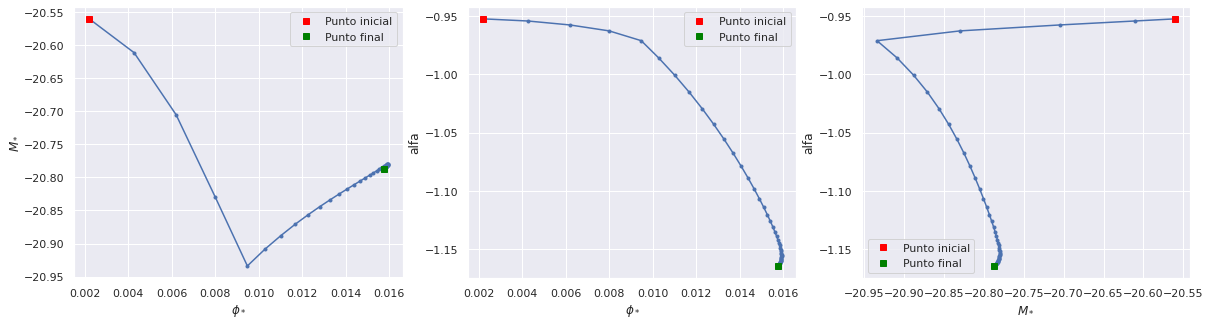

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(j[0], j[1], marker='.')
plt.plot(j[0][0], j[1][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], 's', color='green', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('$M_*$')

plt.subplot(1,3,2)
plt.plot(j[0], j[2], marker='.')
plt.plot(j[0][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], 's', color='green', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('alfa')

plt.subplot(1,3,3)
plt.plot(j[1], j[2], marker='.')
plt.plot(j[1][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], 's', color='green', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$M_*$')
plt.ylabel('alfa')

plt.show()

Se compara el mismo gráfico con la grilla realizada al principio para analizarlo mejor.

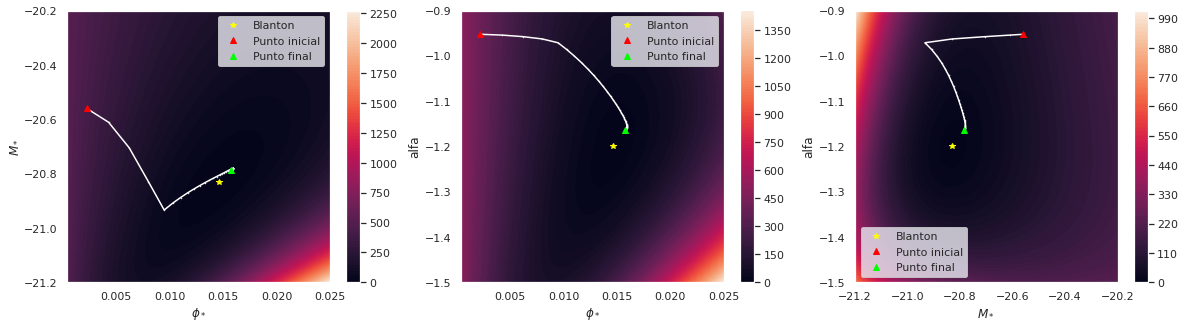

In [72]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100)
plt.colorbar()
plt.plot(0.0146, -20.83, '*', color='yellow', label='Blanton')
plt.plot(j[0], j[1], marker='.',markersize=1, color='white')
plt.plot(j[0][0], j[1][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], '^', color='lime', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('$M_*$')

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100)
plt.colorbar()
plt.plot(0.0146, -1.2, '*', color='yellow', label='Blanton')
plt.plot(j[0], j[2], marker='.',markersize=1, color='white')
plt.plot(j[0][0], j[2][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], '^', color='lime', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('alfa')

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100)
plt.colorbar()
plt.plot(-20.83, -1.2, '*', color='yellow', label='Blanton')
plt.plot(j[1], j[2], marker='.',markersize=1, color='white')
plt.plot(j[1][0], j[2][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], '^', color='lime', label='Punto final') #parametros finales
plt.legend(loc='best')
plt.xlabel('$M_*$')
plt.ylabel('alfa')

plt.show()

Se ve como el valor inicial está alejado de las zonas más oscuras, y luego tiende a acercarse a ella, acercándose al mismo tiempo a los valores que encontró Blanton.

Luego, se ve si los valores encontrados ajustan con el modelo a los datos medidos:

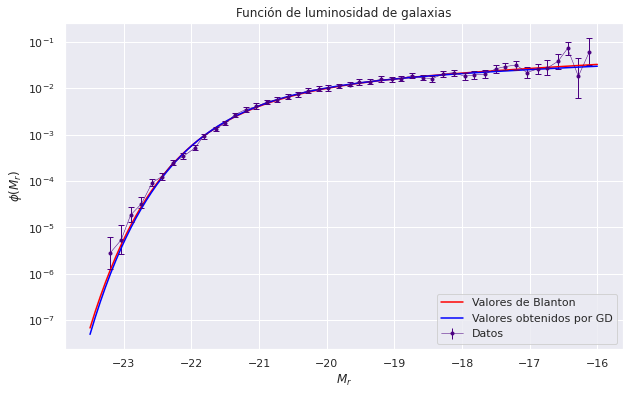

In [73]:
plt.figure(figsize=(10,6))
plt.plot(sx,sy, color='red', label='Valores de Blanton')
plt.plot(sx,model(sx, fi0=j[0][-1], M0=j[1][-1], a=j[2][-1]), color='blue', label='Valores obtenidos por GD')

plt.errorbar(M, f, yerr= (d_in, d_su), marker='o', markersize=3, color='indigo', ecolor='indigo', elinewidth=1, linewidth=0.5, label='Datos')
plt.plot(M,e_in, '_', color='indigo')
plt.plot(M,e_su, '_', color='indigo')

plt.yscale('log')
plt.title('Función de luminosidad de galaxias')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend(loc='lower right')
plt.show()

Se puede ver como los valores encontrados por el método del Gradiente Descendiente ajustan bien a los datos, dando un ajuste muy parecido al de Blanton. Es un método efectivo para la optimización de parámetros.

Por último, para ver como se comporta el método en general se realizan varios caminos sorteando 4 veces más la función 'grad_desc':

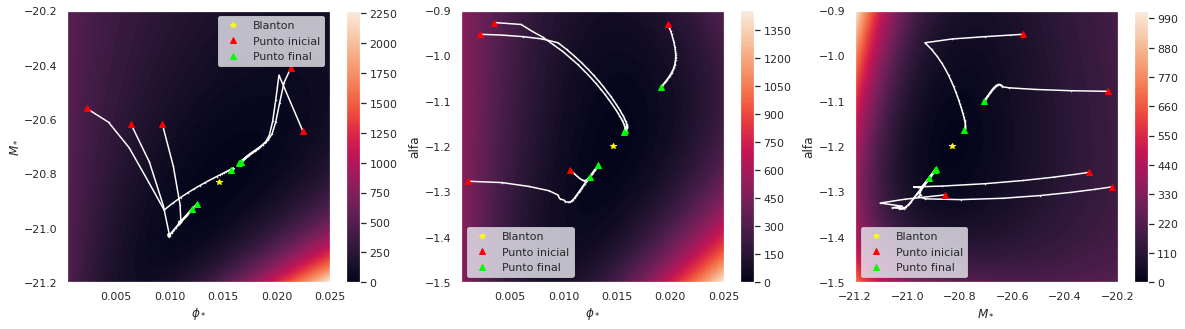

In [79]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100)
plt.colorbar()
plt.plot(0.0146, -20.83, '*', color='yellow', label='Blanton')
plt.plot(j[0], j[1], marker='.',markersize=1, color='white')
plt.plot(j[0][0], j[1][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], '^', color='lime', label='Punto final') #parametros finales
for k in range(4):
    k=grad_desc(M,f,eta=0.05, n_pasos=50)
    plt.plot(k[0], k[1], marker='.',markersize=1, color='white')
    plt.plot(k[0][0], k[1][0], '^', color='red')
    plt.plot(k[0][-1], k[1][-1], '^', color='lime')
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('$M_*$')

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100)
plt.colorbar()
plt.plot(0.0146, -1.2, '*', color='yellow', label='Blanton')
plt.plot(j[0], j[2], marker='.',markersize=1, color='white')
plt.plot(j[0][0], j[2][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], '^', color='lime', label='Punto final') #parametros finales
for k in range(4):
    k=grad_desc(M,f,eta=0.05, n_pasos=50)
    plt.plot(k[0], k[2], marker='.',markersize=1, color='white')
    plt.plot(k[0][0], k[2][0], '^', color='red')
    plt.plot(k[0][-1], k[2][-1], '^', color='lime')
plt.legend(loc='best')
plt.xlabel('$\phi_*$')
plt.ylabel('alfa')

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100)
plt.colorbar()
plt.plot(-20.83, -1.2, '*', color='yellow', label='Blanton')
plt.plot(j[1], j[2], marker='.',markersize=1, color='white')
plt.plot(j[1][0], j[2][0], '^', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], '^', color='lime', label='Punto final') #parametros finales
for k in range(4):
    k=grad_desc(M,f,eta=0.05, n_pasos=50)
    plt.plot(k[1], k[2], marker='.',markersize=1, color='white')
    plt.plot(k[1][0], k[2][0], '^', color='red')
    plt.plot(k[1][-1], k[2][-1], '^', color='lime')
plt.legend(loc='best')
plt.xlabel('$M_*$')
plt.ylabel('alfa')

plt.show()

Se puede ver como en todos los casos a pesar de que los caminos empiezan en lugares distintos, siempre tienden a acercarse a los valores mínimos (zonas más oscuras).

## Conclusiones

En este trabajo se logró ajustar la función de Schechter a la función de luminosidad de galaxias obtenida por Blanton et al. 2001 por medio del método del Gradiente Descendiente. Este método  es un algoritmo de optimización iterativo de primer orden para encontrar un mínimo local de una función diferenciable. Se parte de un rango de valores y el método los mejora, encontrando el mínimo de la función $\chi^2$.

Los valores obtenidos para los parámetros son similares a los de Blanton y ajustan bien a los datos.